<a href="https://colab.research.google.com/github/difurka/mlbookcamp_learning/blob/main/mlzoomcamp_midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

This competition is homework for module 3 of the advanced DLS stream (spring 2021). You will learn how to model customer churn for a telecom company. This task is very important in practice and algorithms for solving it are used in real telecom companies, because if we know that a client is going to leave us, then we will try to keep him by offering some kind of bonuses.(https://www.kaggle.com/competitions/advanced-dls-spring-2021/overview)


Next models are used: Logistic Regression, DecisionTreeClassifier, Random Forest Classifier, and Gradient boosting, and CatBoost.

Random Forest Classifier has given the best result for test dataset on Kaggle.


Add datasets from kaggle:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle/"
!kaggle competitions download -c advanced-dls-spring-2021
!unzip \*.zip  && rm *.zip

Mounted at /content/gdrive
  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 70.1MB/s]
Archive:  advanced-dls-spring-2021.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from tqdm import tqdm,trange,tqdm_notebook

 ## Load data

In [ ]:
X_train = pd.read_csv('/content/train.csv')
X_test = pd.read_csv('/content/test.csv')

Look at random rows

In [ ]:
X_train.sample(n=5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4805,42,74.15,3229.4,Female,1,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),1
1919,12,81.70,858.6,Male,0,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),1
106,31,20.10,589.25,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
704,19,59.55,1144.6,Male,0,No,No,Yes,Yes,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,0
5023,1,19.55,19.55,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1


Are there nulls?

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
X_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Delete duplicates:

In [ ]:
X_train.duplicated().sum()

14

In [ ]:
X_train = X_train.drop_duplicates()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   object 
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

## Data cleaning and preparation

In [ ]:
X_train.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'IsSeniorCitizen',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod',
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'


X_train['TotalSpent'] = pd.to_numeric(X_train['TotalSpent'], errors='coerce')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_train['TotalSpent'] = X_train['TotalSpent'].fillna(X_train['TotalSpent'].mean())
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(X_test['TotalSpent'].mean())


<ipython-input-11-dbc0ea87551c>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TotalSpent'] = pd.to_numeric(X_train['TotalSpent'], errors='coerce')
<ipython-input-11-dbc0ea87551c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['TotalSpent'] = X_train['TotalSpent'].fillna(X_train['TotalSpent'].mean())


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5268 non-null   int64  
 1   MonthlySpending           5268 non-null   float64
 2   TotalSpent                5268 non-null   float64
 3   Sex                       5268 non-null   object 
 4   IsSeniorCitizen           5268 non-null   int64  
 5   HasPartner                5268 non-null   object 
 6   HasChild                  5268 non-null   object 
 7   HasPhoneService           5268 non-null   object 
 8   HasMultiplePhoneNumbers   5268 non-null   object 
 9   HasInternetService        5268 non-null   object 
 10  HasOnlineSecurityService  5268 non-null   object 
 11  HasOnlineBackup           5268 non-null   object 
 12  HasDeviceProtection       5268 non-null   object 
 13  HasTechSupportAccess      5268 non-null   object 
 14  HasOnlin

In [ ]:
X_train.describe().round()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5268.0,5268.0,5268.0,5268.0,5268.0
mean,32.0,65.0,2297.0,0.0,0.0
std,25.0,30.0,2267.0,0.0,0.0
min,0.0,18.0,19.0,0.0,0.0
25%,9.0,36.0,405.0,0.0,0.0
50%,29.0,70.0,1419.0,0.0,0.0
75%,55.0,90.0,3809.0,0.0,1.0
max,72.0,119.0,8685.0,1.0,1.0


In [ ]:
X_train[num_cols].corr().style.background_gradient(cmap='coolwarm')

,ClientPeriod,MonthlySpending,IsSeniorCitizen,TotalSpent
ClientPeriod,1.000000,0.248047,0.010775,0.824598
MonthlySpending,0.248047,1.000000,0.215061,0.651475
IsSeniorCitizen,0.010775,0.215061,1.000000,0.093522
TotalSpent,0.824598,0.651475,0.093522,1.000000


In [ ]:
X_train[cat_cols].nunique()

Sex                         2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

In [ ]:
from sklearn.metrics import mutual_info_score
def mutual_info_churn_score(series):
    return mutual_info_score(series, X_train.Churn)
mi = X_train[cat_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

HasContractPhone            0.097955
HasOnlineSecurityService    0.067773
HasTechSupportAccess        0.062849
HasInternetService          0.053713
HasOnlineBackup             0.047331
HasDeviceProtection         0.044004
PaymentMethod               0.043035
HasMovieSubscription        0.032343
HasOnlineTV                 0.031956
IsBillingPaperless          0.019481
HasChild                    0.014120
HasPartner                  0.010809
HasMultiplePhoneNumbers     0.000885
HasPhoneService             0.000050
Sex                         0.000033
dtype: float64

## Logistic Regression

In [ ]:
def train(df_train, y_train, C):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [ ]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [ ]:
df_train, df_val = train_test_split(X_train, test_size=0.2, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = df_train.Churn
y_val = df_val.Churn

del df_train['Churn']
del df_val['Churn']


# for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

#     dv, model = train(df_train, y_train, C=C)
#     y_pred = predict(df_train, dv, model)


#     y_pred_v = predict(df_val, dv, model)
#     auc = roc_auc_score( y_train, y_pred)
#     auc_v = roc_auc_score( y_val, y_pred_v)
#     print(C, auc, auc_v)

In [ ]:
x_tr = X_train
y_tr = X_train.Churn

del x_tr['Churn']

dv, model = train(x_tr, y_tr, C=1)
y_pred = predict(x_tr, dv, model)


In [ ]:

dv, model = train(df_train, y_train, C=1)

y_pred = predict(df_train, dv, model)
y_pred_v = predict(df_val, dv, model)
auc = roc_auc_score( y_train, y_pred)
auc_v = roc_auc_score( y_val, y_pred_v)
print(auc, auc_v)

0.8537228801508974 0.8225723959936542


### ROC-AUC on test for contest: 0.84435

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [ ]:
def train_tree(df_train, y_train, depth):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    return dv, dt

def predict_tree(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

# for depth in tqdm([1, 2, 3, 4, 5, 6, 10, 15, 20, None]):

#     dv, model = train_tree(df_train, y_train, depth)
#     y_pred = predict_tree(df_train, dv, model)

#     y_pred_v = predict_tree(df_val, dv, model)
#     auc = roc_auc_score( y_train, y_pred)
#     auc_v = roc_auc_score( y_val, y_pred_v)
#     print(depth, auc, auc_v)

In [ ]:
def train_tree_l(df_train, y_train, depth, leaf):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
    dt.fit(X_train, y_train)

    return dv, dt

def predict_tree_l(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

# scores = []

# for depth in [4, 5, 6]:
#     for s in [1, 5, 10, 15, 20, 500, 100, 200]:
#         dv, model = train_tree_l(df_train, y_train, depth, s)
#         y_pred = predict_tree_l(df_train, dv, model)

#         y_pred_v = predict_tree_l(df_val, dv, model)
#         auc = roc_auc_score( y_train, y_pred)
#         auc_v = roc_auc_score( y_val, y_pred_v)
#         scores.append((depth, s, auc, auc_v))

In [ ]:
# columns = ['max_depth', 'min_samples_leaf', 'auc', 'auc_val']
# df_scores = pd.DataFrame(scores, columns=columns)
# df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc_val'])
# df_scores_pivot.round(3)

In [ ]:
# sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [ ]:
dv, model = train_tree_l(df_train, y_train, 5, 15)
y_pred = predict(df_train, dv, model)
y_pred_v = predict(df_val, dv, model)
auc = roc_auc_score( y_train, y_pred)
auc_v = roc_auc_score( y_val, y_pred_v)
print(auc, auc_v)



0.856755820570552 0.8192171998200459


### ROC-AUC on test for contest for decision tree: 0.84058


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def train_randtree(df_train, y_train, estimators, d, leaf, feat, b):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    dt = RandomForestClassifier(max_features = feat,
                                n_estimators=estimators,
                                max_depth=d,
                                min_samples_leaf=leaf,
                                bootstrap = b,
                                random_state=1)
    dt.fit(X_train, y_train)

    return dv, dt

def predict_randtree(df, dv, model):
    dicts = df.to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

scores = []

for b in [True, False]:
    dv, model = train_randtree(df_train, y_train, 50, 5, 10, 'sqrt',True)
    y_pred = predict_randtree(df_train, dv, model)

    y_pred_v = predict_randtree(df_val, dv, model)
    auc = roc_auc_score( y_train, y_pred)
    auc_v = roc_auc_score( y_val, y_pred_v)
#     scores.append(( f, auc, auc_v))
    print(( b, auc, auc_v))


(True, 0.862451880324092, 0.829529041271044)
(False, 0.862451880324092, 0.829529041271044)


In [ ]:
dv, model = train_randtree(x_tr, y_tr, 50, 5, 10, 'sqrt',True)
submission = pd.read_csv('/content/submission.csv')
submission['Churn'] = predict_randtree(X_test, dv, model)

In [ ]:
dv, model = train_randtree(df_train, y_train, 50, 5, 10, 'sqrt',True)
y_pred = predict(df_train, dv, model)
y_pred_v = predict(df_val, dv, model)
auc = roc_auc_score( y_train, y_pred)
auc_v = roc_auc_score( y_val, y_pred_v)
print(auc, auc_v)

0.862451880324092 0.829529041271044


### ROC-AUC on test for contest for decision tree: 0.84478

## Gradient boosting and XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
dv = DictVectorizer(sparse=False)

dicts = df_train.to_dict(orient='records')
df_tr = dv.fit_transform(dicts)

dicts = df_val.to_dict(orient='records')
df_v = dv.transform(dicts)

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(df_tr, label=y_train)
dval = xgb.DMatrix(df_v, label=y_val)

In [ ]:
scores = {}

In [ ]:

def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
%%capture output

xgb_params = {
    'eta':0.006,
    'max_depth': 5,
    'min_child_weight': 6,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=250,
                  verbose_eval=5,
                  evals=watchlist)


In [ ]:
key = 'eta = %s dep=%s''child=%s'% (xgb_params['eta'], xgb_params['max_depth'], xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'eta = 0.006 dep=5child=6'

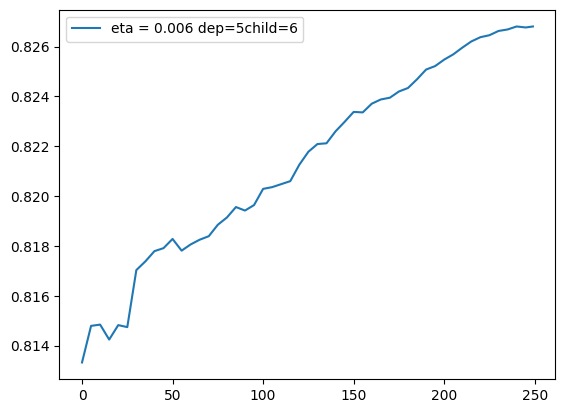

In [ ]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
# plt.ylim(0.82, 0.83)
# plt.xlim(10, 40)
plt.legend()

In [ ]:
dicts = X_test.to_dict(orient='records')
df_test = dv.transform(dicts)

features = dv.get_feature_names_out()
dtest = xgb.DMatrix(df_test)
submission['Churn'] = model.predict(dtest)

For all X_train

In [ ]:
df_train_all = x_tr

dv = DictVectorizer(sparse=False)

dicts = df_train_all.to_dict(orient='records')
df_tr = dv.fit_transform(dicts)

features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(df_tr, label=y_tr)

model = xgb.train(xgb_params, dtrain, num_boost_round=800,
                  verbose_eval=5,
                  evals=watchlist)


dtest = xgb.DMatrix(df_test)
submission['Churn'] = model.predict(dtest)

[0]	train-auc:0.85314	val-auc:0.83786
[5]	train-auc:0.85810	val-auc:0.84180
[10]	train-auc:0.85798	val-auc:0.84135
[15]	train-auc:0.85797	val-auc:0.84008
[20]	train-auc:0.85794	val-auc:0.83982
[25]	train-auc:0.85812	val-auc:0.83954
[30]	train-auc:0.85897	val-auc:0.83970
[35]	train-auc:0.85903	val-auc:0.83937
[40]	train-auc:0.85930	val-auc:0.84010
[45]	train-auc:0.85979	val-auc:0.84123
[50]	train-auc:0.86023	val-auc:0.84203
[55]	train-auc:0.86085	val-auc:0.84286
[60]	train-auc:0.86125	val-auc:0.84263
[65]	train-auc:0.86146	val-auc:0.84308
[70]	train-auc:0.86198	val-auc:0.84354
[75]	train-auc:0.86234	val-auc:0.84371
[80]	train-auc:0.86261	val-auc:0.84428
[85]	train-auc:0.86283	val-auc:0.84440
[90]	train-auc:0.86325	val-auc:0.84491
[95]	train-auc:0.86394	val-auc:0.84514
[100]	train-auc:0.86435	val-auc:0.84574
[105]	train-auc:0.86476	val-auc:0.84600
[110]	train-auc:0.86572	val-auc:0.84694
[115]	train-auc:0.86645	val-auc:0.84755
[120]	train-auc:0.86699	val-auc:0.84785
[125]	train-auc:0.8674

In [ ]:
submission['Churn']

0       0.042336
1       0.635492
2       0.666194
3       0.020385
4       0.008010
          ...   
1756    0.208136
1757    0.013438
1758    0.843022
1759    0.598301
1760    0.009069
Name: Churn, Length: 1761, dtype: float32

### ROC-AUC on test for contest: 0.85198

In [ ]:
submission.to_csv('/content/submission.csv', index=False)

#### Save model

In [ ]:
import pickle
output_file = 'model_tree.bin'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## Catboost

In [ ]:
!pip install catboost
import catboost

boosting_model = catboost.CatBoostClassifier(n_estimators=50, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')

boosting_model.fit(df_train, y_train)

y_train_predicted = boosting_model.predict_proba(df_train)[:, 1]
y_val_predicted = boosting_model.predict_proba(df_val) [:, 1]

from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y_train, y_train_predicted)
val_auc = roc_auc_score(y_val, y_val_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_val, y_val_predicted)[:2], label='val AUC={:.4f}'.format(val_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

### ROC-AUC on test for contest for catboost: 0.84593

In [ ]:
boosting_model.fit(x_tr, y_tr)
# submission['Churn'] = boosting_model.predict_proba(X_test)[:, 1]